## DATA UNDERSTANDING

### Description of columns in the file:

[age] is an integer from 0 to 116, indicating the age

[gender] is either 0 (male) or 1 (female)

[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

[date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [63]:
#importing libraries
import os # to access files in the opereating system
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
     

In [106]:
#Accessing all image file names to get ages
utkface_path = ('data/UTKFace')
utkface_image_names = os.listdir(utkface_path)


In [65]:
# function to generate the labels from the image file names according to the format given above.

def age_gender_race_split(image_name):
    
    """ This function generates labels from the image file names"""

    image_labels = image_name.split('_')
    age = image_labels[0]
    gender = image_labels[1]
    race = image_labels[2]
    timestamp=image_labels[-1]
    

    return (age, gender, race, timestamp)
     

In [66]:
#using for loops to store labels in relevant arrays relevant 
age_labels = np.array([])
gender_labels = np.array([])
race_labels = np.array([])
timestamp_labels=np.array([])

for image in utkface_image_names:
    age, gender, race,timestamp = age_gender_race_split(image)
    age_labels = np.append(age_labels, age)
    gender_labels = np.append(gender_labels, gender)
    race_labels = np.append(race_labels, race)
    timestamp_labels=np.append(timestamp_labels, timestamp)

In [67]:
age = pd.Series(age_labels, name = 'Ages')
gender = pd.Series(gender_labels, name = 'Genders')
race = pd.Series(race_labels, name="Races")
timestamp=pd.Series(timestamp_labels, name="Timestamp")
df = pd.concat([age, race, gender, timestamp], axis=1)
df.head()

,Ages,Races,Genders,Timestamp
0,100,0,0,20170112213500903.jpg.chip.jpg
1,100,0,0,20170112215240346.jpg.chip.jpg
2,100,0,1,20170110183726390.jpg.chip.jpg
3,100,0,1,20170112213001988.jpg.chip.jpg
4,100,0,1,20170112213303693.jpg.chip.jpg


In [68]:
#getting value counts for Age column
age_counts=df['Ages'].value_counts()
age_counts

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: Ages, Length: 104, dtype: int64

In [69]:
#getting value counts for Race
race_counts=df['Races'].value_counts()
race_counts

0                                 10078
1                                  4526
3                                  3975
2                                  3434
4                                  1692
20170109150557335.jpg.chip.jpg        1
20170109142408075.jpg.chip.jpg        1
20170116174525125.jpg.chip.jpg        1
Name: Races, dtype: int64

We have noticed there are 3 rows that do not follow naming convention. We will handle this in Data preparation

In [70]:
gender_counts= df['Genders'].value_counts()
gender_counts

0    12391
1    11317
Name: Genders, dtype: int64

In [71]:
class DataUnderstanding(object):
    """This is a class that does basic data understanding"""
    def __init__(self, df):
        self.shape = df.shape
        self.info = df.info
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()
        self.types = df.dtypes


In [72]:
#instantiating the classes
dataund= DataUnderstanding(df)

In [73]:
#Getting the shape of the dataset
print(f"shape:{dataund.shape}")

shape:(23708, 4)


In [74]:
#getting the info of the data
print(dataund.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ages       23708 non-null  object
 1   Races      23708 non-null  object
 2   Genders    23708 non-null  object
 3   Timestamp  23708 non-null  object
dtypes: object(4)
memory usage: 741.0+ KB
None


we can see that the dataset contains 23708 rows and 3 columns.The 3 columns has data type  string.We can also see there are no null values.

In [75]:
#getting the missing values
dataund.missing

Ages         0
Races        0
Genders      0
Timestamp    0
dtype: int64

There are no missing values.

In [76]:
#checking the data types
dataund.types

Ages         object
Races        object
Genders      object
Timestamp    object
dtype: object

The 3 columns have object data type

In [77]:
#checking for duplicates
print(f"Duplictes:{dataund.duplicates.sum()}")

Duplictes:0


There are no duplicates this is attributed to the inclusion of date and time column.

## DATA PREPARATION

Validity- We will be checking that the data is in the correct format.

Consistency- We will be obeserving the consistency of the data. We will be checking for duplicates

We will be checking for missing values

In [78]:
#dropping rows 
df = df[df.Races.isin(["0","1","2","3","4"])]
dataund= DataUnderstanding(df)
print(f"Shape:{dataund.shape}")


Shape:(23705, 4)


After dropping the three rows we have 23705 rows.

In [79]:
#splitting the timestamp column
import datetime
for time in df["Timestamp"]:
    parts = time.split(".")
    date_time = parts[0]
    date_time = date_time.split(" ")
    date_time = date_time[-1][:8]
    date = time.replace(time,date_time)
    df['Timestamp'] = date  
    df["Timestamp"]= pd.to_datetime(df['Timestamp'], infer_datetime_format=True)



In [80]:
# Create the Year, month and day columns
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df.head()

,Ages,Races,Genders,Timestamp,Year,Month,Day
0,100,0,0,2017-01-12,2017,1,12
1,100,0,0,2017-01-12,2017,1,12
2,100,0,1,2017-01-12,2017,1,12
3,100,0,1,2017-01-12,2017,1,12
4,100,0,1,2017-01-12,2017,1,12


In [81]:
#getting the tail
df.tail()

,Ages,Races,Genders,Timestamp,Year,Month,Day
23703,9,3,1,2017-01-12,2017,1,12
23704,9,3,1,2017-01-12,2017,1,12
23705,9,4,1,2017-01-12,2017,1,12
23706,9,4,1,2017-01-12,2017,1,12
23707,9,4,1,2017-01-12,2017,1,12


In [83]:
#getting the missing values
dataund= DataUnderstanding(df)
dataund.missing

Ages         0
Races        0
Genders      0
Timestamp    0
Year         0
Month        0
Day          0
dtype: int64

In [84]:
#checking the duplicates
print(f"Duplicates:{dataund.duplicates.sum()}")

Duplictes:22858


Majority of the images were taken on the same day that explains the number of duplicates. 

In [88]:
#proper object types
convert_dict = {'Ages': int,
                'Races': int,
                "Genders": int
                }
 
df = df.astype(convert_dict)
df.head(10)

,Ages,Races,Genders,Timestamp,Year,Month,Day
0,100,0,0,2017-01-12,2017,1,12
1,100,0,0,2017-01-12,2017,1,12
2,100,0,1,2017-01-12,2017,1,12
3,100,0,1,2017-01-12,2017,1,12
4,100,0,1,2017-01-12,2017,1,12
5,100,0,1,2017-01-12,2017,1,12
6,100,0,1,2017-01-12,2017,1,12
7,100,0,1,2017-01-12,2017,1,12
8,100,2,1,2017-01-12,2017,1,12
9,100,2,1,2017-01-12,2017,1,12


### EXPLORATORY DATA ANALYSIS

##### Univariate Analysis

In [100]:
#defining a function that performs univariate analysis
def get_count1(df,column):
    
    """ A function that performs univariate analysis"""
    
    plt.figure(figsize=(16,8))
    sns.countplot(x=column,data=df)
    plt.title(f'No of images per Races{column}')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.show();


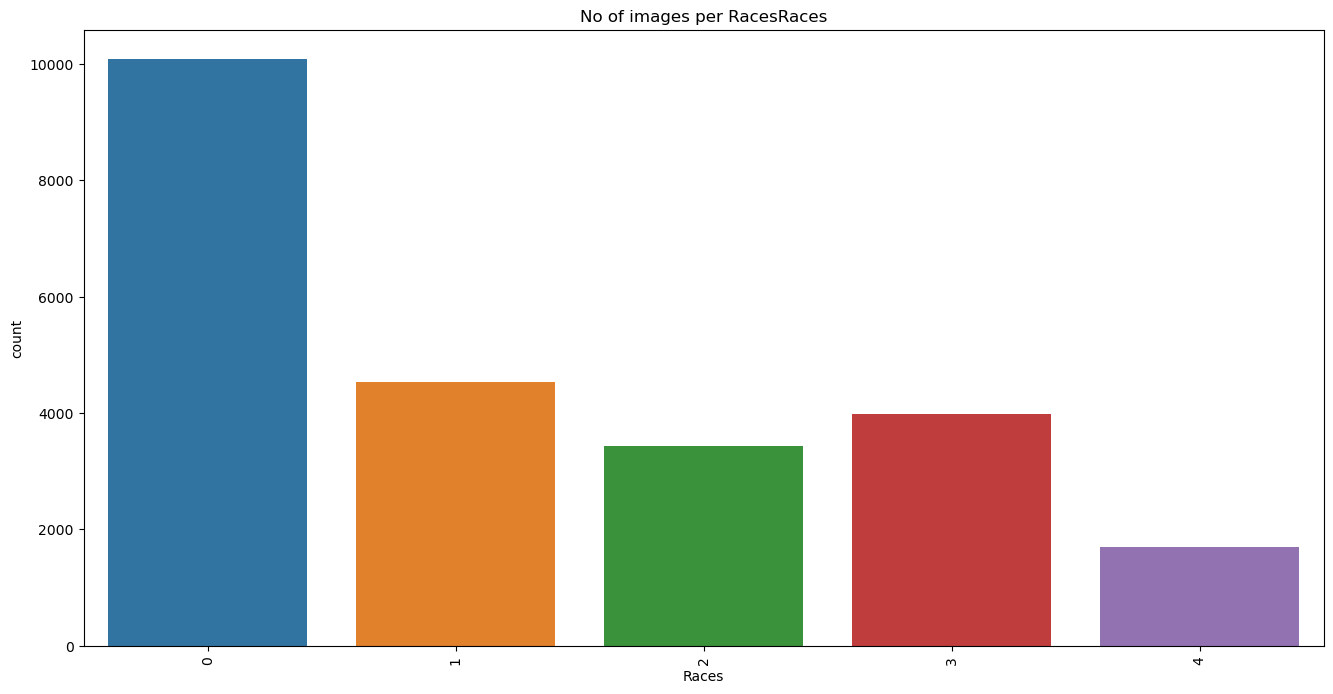

In [101]:
get_count1(df, 'Races')

From the bar chats above, the Whites, Blacks, Asians, Indians, and Other races are denoted by 0, 1, 2, 3 and 4 respectively.

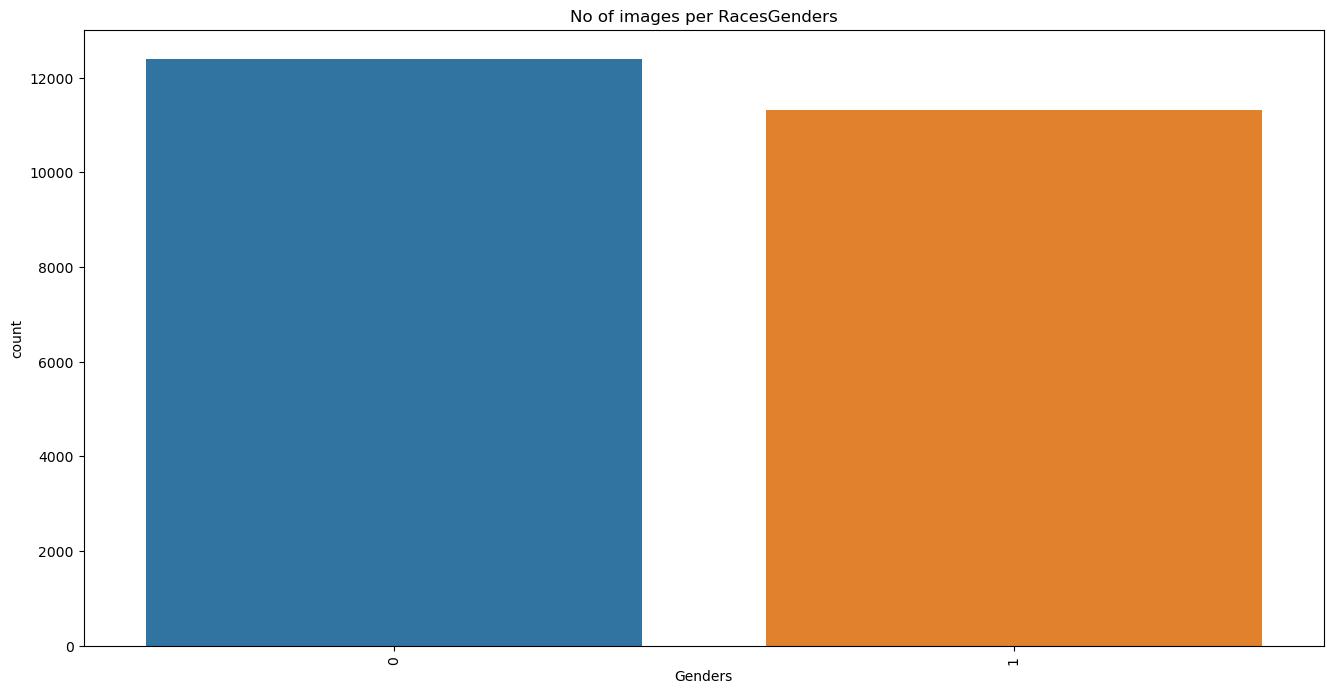

In [102]:
get_count1(df, 'Genders')

0 represents males while 1 represents females.

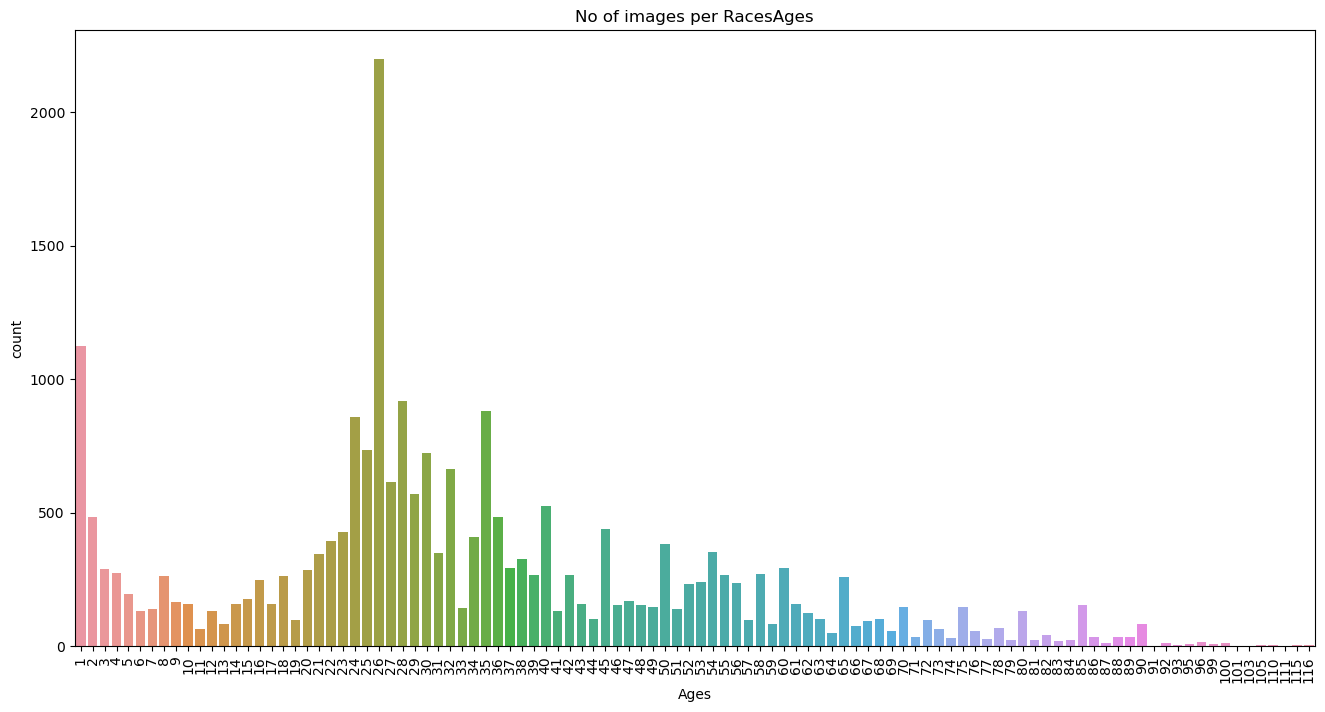

In [103]:
get_count1(df, 'Ages')

The bar charts above illustrate the discripancies in the age distributions. The majority of the images came from 26 year olds with a value count of 2197 followed by 1 year olds, 1123 images. Lesser images came from the old, above a hundred years. There was only a single image for both 103 and 111 years old.

##### Bivariate Analysis

In [104]:
def get_biv(column1,df,column2):
    """ A function that does bivariate analysis"""
    plt.figure(figsize=(16,8))
    sns.countplot(x=column1, data= df,hue=column2)
    plt.title(f'{column1} on {column2}')
    plt.ylabel(f'count of{column1}')
    plt.xlabel(f'{column1}')
    plt.show()

Hello

## EVALUATION

## DEPLOYMENT